1 - Crie um Modelo de classificação de imagens, a partir da importação da base de dados do Sci-kit Learn. Este Modelo deve ter as seguintes caracteristicas:

A) Ultilize a base de dados Mnist Dataset
B) Divida a base de treinamento e teste em 80/20.
C) Ultilize a técnica de Cross Validation (K-fold = 5)
D) Ultilize a técnica de Random Search ou grid Serch para escolha dos melhores parâmetros
E) Faça a impressão da matriz de confusão para o modelo

In [14]:
#importando Bibliotecas 
import matplotlib.pyplot as plt

#importando o datasets
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

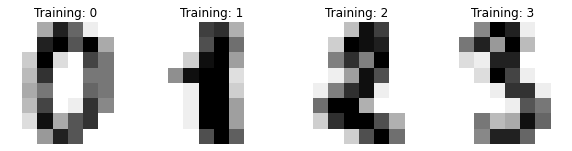

In [15]:
#importando o mnist dataset
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i ' % label)

In [16]:
# Classificação com SVM
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

#Criando a classificação
clf = svm.SVC(gamma=0.001)

#Separando 80% para treinamento e 20% teste
x_train, x_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.8, shuffle=False)

#lendo variaveis de teinamento
clf.fit(x_train, y_train)

#Preparando valores de sub teste
predicted = clf.predict(x_test)

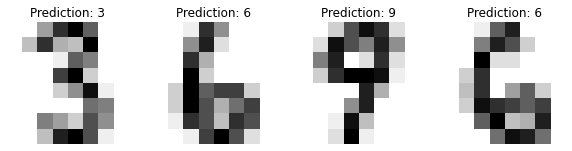

In [17]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, x_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [18]:
print(f'Relatório de classificação para classificador {clf}:\n'
      f'{metrics.classification_report(y_test, predicted)}\n')

Relatório de classificação para classificador SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       140
           1       0.90      0.73      0.80       144
           2       0.86      0.93      0.89       141
           3       0.98      0.76      0.86       145
           4       0.98      0.97      0.97       147
           5       0.96      0.92      0.94       146
           6       0.97      0.96      0.96       145
           7       0.96      0.91      0.94       144
           8       0.84      0.87      0.86       140
           9       0.65      0.91      0.76       146

    accuracy                           0.89      1438
   macro avg       0.91      0.89      0.90      1438
weighted avg       0.91      0.89      0.90      1438




In [19]:
#importando pacote para salvar 
import pickle
#salvando modelo
modelo_treinado = pickle.dumps(clf)

In [20]:
#carregando o modelo treinado
modelo_treinado = pickle.loads(modelo_treinado)
modelo_treinado.predict(data[0:1])

array([0])

In [21]:
#olhando conteudo do vetor de teste 
x_test[0]

array([ 0.,  0.,  6., 13., 16., 10.,  0.,  0.,  0.,  4., 13.,  5.,  4.,
       16.,  0.,  0.,  0.,  0.,  0.,  1., 10.,  8.,  0.,  0.,  0.,  0.,
        0., 12., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  3.,  7., 15.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.,  8.,  6.,
        3., 11.,  7.,  0.,  0.,  0.,  4., 14., 16., 11.,  1.,  0.])

In [22]:
#fazendo predição do novo dado com o modelo carregado
modelo_treinado.predict([x_test[0]])

array([3])

Matriz de Confusão:
 [[139   0   0   0   1   0   0   0   0   0]
 [  0 105  18   0   0   1   4   0  13   3]
 [  0   0 131   2   0   0   0   0   0   8]
 [  0   0   2 110   0   3   0   2   4  24]
 [  0   0   0   0 142   0   0   1   0   4]
 [  0   0   0   0   2 134   1   0   0   9]
 [  2   1   0   0   0   0 139   0   3   0]
 [  0   0   0   0   0   0   0 131   1  12]
 [  0   3   2   0   0   1   0   0 122  12]
 [  0   8   0   0   0   1   0   2   2 133]]


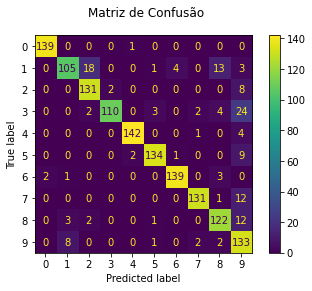

In [23]:
#avaliando modelo 
disp = metrics.plot_confusion_matrix(clf, x_test, y_test)
disp.figure_.suptitle('Matriz de Confusão')
print(f'Matriz de Confusão:\n {disp.confusion_matrix}')

plt.show()
      

2 - Após a etapa de treinamento , analise o modelo respondedo as questões a seguir:


A) Qual a acurácia do modelo? Justique 
R: A acurácia do modelo foi boa , ela foi de 89% de acertividade então em minha opinião foi otimo o desenpenho do modelo

B) O modelo teve uma boa performance? Justifique
R: No meu ponto de vista ele teve sim quse em todos sua precisão foi acima dos 80%.

C) Quais foram os melhores parâmetro escolhidos ? Justique
R: Pelo que vi quandio troquei o parâmetro de treino dele, quanto mas treino mas performace.

D) Quais as p´rincipais dificuldade encontradas para criação do seu modelo de classificação?
R: Olha creio que muitas ainda pelo fato ser novidade mechendo com Machine Learning, mas com o tempo vou aprimorando meus desenvolvimento.


3 - Faça uma pesquisa para conhecer um pouco mais sobre o universo de Machine Learning e responda as questôesa seguir:

A) Qual é a diferença entre um parâmetro de modelo e um algoritmo de aprendizagem de hiperparâmetro?
R: Hiperparâmetro é tudo que nós informamos para um modelo ou algoritmo antes dele começar o treino, Parãmetro e tudo que ele aprende com o treino.

B) Você pode citar quatro dos principais desafios do aprendizado de máquina ?
R: Péssimas intenções, Parâmetros de sistema nem sempre incluem ética, Correlações falsas, Ciclos de feedback.

C) Se o seu modelo tem um ótimo desempenho nos dados de treinamento, mas generaliza mal para novas instãncias, o que está acontecendo? Você pode citar três soluçôes possiveis?
R:Se um modelo tiver um ótimo desempenho nos dados de treinamento, mas generalizar mal para novas instâncias, é provável que o modelo esteja sobrescrevendo os dados de treinamento (ou tivemos muita sorte com os dados de treinamento). As possíveis soluções para o overfitting é basicamente obter mais dados e simplificando o modelo. (selecionando um algoritmo mais simples, reduzindo o número de parâmetros ou recursos utilizados ou regularizando o modelo) ou  reduzindo o ruído nos dados de treinamento.

D) O que é um conjunto de teste e por que você deveria usa-lo?
R: Um conjunto de teste é usado para estimar o erro de generalização que um modelo fará em novas instâncias, antes que o modelo seja lançado na produção.

E) Qual é o propósito de um conjunto de validação?
R: Um conjunto de validação é usado para comparar modelos. Permite selecionar o melhor modelo e ajustar os hiperparâmetros.

F) O que pode dar errado se você ajustar hiperparâmetro usando o conjunto de teste ?
R: Se você ajustar os hiperparâmetros usando o conjunto de testes, corre o risco de superajustá-lo, e o erro de generalização que você medir será otimista(você pode iniciar um modelo com desempenho pior do que o esperado).